$\newcommand{\bmx}{\large \boldsymbol{x} \normalsize}$
$\newcommand{\bmc}{\large \boldsymbol{c} \normalsize}$
$\newcommand{\bmy}{\large \boldsymbol{y} \normalsize}$
$\newcommand{\bmb}{\large \boldsymbol{b} \normalsize}$

# Metodo de Gauss-Seidel
De nuevo consideramos la matriz como una suma de tres matrices

$$A = L + D + U $$
A diferencia de Jacobi vamos a separar la $L+D$ de lo demas

$$(L +D ) \bmx  + U \bmx = \bmb $$

Esto me genera la siguiente iteracion (donde $\bmx_{k+1}$ a la izquerda y $\bmx_k$ a la derecha (despejando)

$$\bmx_{k+1} = (L+D)^{-1} (\bmb - U \bmx_{k}) $$

Esta es la iteracion llamada **Gauss-Seidel**.









La iteracion clave de la clase 1 fue

$$ \bmx_{k+1} = T_{GS} \bmx_k + \bmc $$
donde

$$T_{GS} = -(L+D)^{-1} U  \quad , \quad \bmc = (L+D)^{-1} \bmc $$

Podemos escribir esto en forma "granulada" (en componentes, escalar, o con indices)

$$a_{ii} x_i^{(k+1)} + \sum_{j=1}^{i-1} a_{ij} x_j^{(k+1)}  = -\sum_{j=i+1}^n a_{ij} x_j^{(k)} + b_i $$

Podemos despejar asumiendo que en la dianal no hay ceros

$$x_i^{(k+1)} = \frac{1}{a_{ii}}
\left ( b_i - \sum_{j=1}^{i-1} a_{ij} x_j^{(k+1)} - \sum_{j=i+1}^n a_{ij} x_j^{(k)}   \right ) $$


El algoritmo queda como sigue.

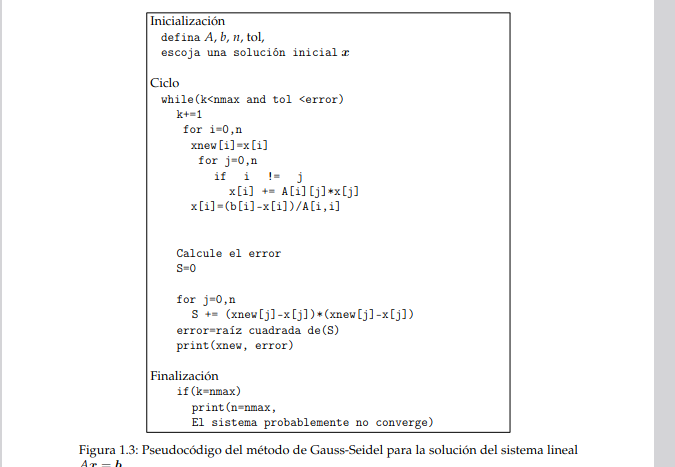

**Ejemplo 1.2.2**: Encuentre la solucion aproximada del sistema

$$\begin{pmatrix} 5 & -2 & 3 \\ -3 & 8 & 1 \\ -3 & -1 & - 6\end{pmatrix}
\begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} = \begin{pmatrix} -1 \\ 4 \\ 0 \end{pmatrix} $$

Asumamos una tolerancia de $0.1$.

De la misma forma que hicimos en Jacobi, escribimos las ecuaciones. Despejamos el termino $x_i$ de cada una de ellas.
Tambien comenzamos en $\bmx_0=(0,0,0)^T$


* **Primera Iteracion** ($k=1$)
La primera ecuacion es

$$5 x_1 - 2 x_2 + 3 x_3 = -1 $$
Depejamos $x_1$


$$x_1 = \frac{-1}{5} + \frac{2 x_2 + 3x_3}{5} $$
$$x_1 = \frac{-1}{5}=-0.5$$

La diferencia entre Jacobi y Gauss Seidel se da a partir de la segunda ecuacion

$-3 x_1 + 8 x_2 + x_3 = 4$.
Despejamos el de la mitad

$$x_2 = \frac{1}{8} (4  + 3 x_1 - 8 x_2) $$
La actualizacion es inmediate. $x_1=-0.4$ tenemos entonces

$$x_2 = \frac{4 + 3(-0.2) - 0}{8} \approx 0.425 $$

Por ultimo, para primera iteracion

$$ x_3 = \frac{3 (-0.2) + 0.425}{-6}  \approx 0.029\overline{16} $$

Calculamos ahora  el error en la norma $\ell_2$
con respecto a $(0,0,0)^T$

$$ \sqrt{(0.2^2 + 0.425^2 + (0.029\overline{16})^2} \approx 0.4706$$

Despues de la primera iteracion tenemos

$$\bmx_1 = \begin{pmatrix} -0.2 \\ 0.425 \\ 0.029\overline{16} \end{pmatrix} $$



**Segunda iteracion** $(k=2)$.
No repito el proceso, solo coloco la solucion

$$\bmx_2 = \begin{pmatrix} -0.0475 \\ 0.478454 \\ -0.056\end{pmatrix}  $$
con un error de $$0.1827$ todavia ($>0.1$)

Seguimos a una tercera iteracion

$$\bmx_{3} = \begin{pmatrix} -0.025 \\ 0.51638 \\ -0.09857 \end{pmatrix}  $$

El error en este momento es $error=0.0922 < 0.1$ lo que indica el fin de las iteraciones.

Vamos a codificar el algoritmo en `Python`.

In [1]:
# algoritmo para resolver Ax=b usand Gauss-Seidel
# implementacion vectorizada
import numpy as np
from numpy import linalg as LA

def gauss_seidel(A, b, nmax, tol):
    L = np.tril(A) # triangular inferior
    U = A - L # triangular superior
    n = len(b)
    x = np.zeros(n)
    k=0
    error = 10

    # calcule la inversa de la triangular inferior
    LAI = LA.inv(L)

    while ( k < nmax and tol < error):
        xnew = np.dot( LAI, b - np.dot(U, x))
        error = LA.norm(xnew-x)
        print("solucion x para la iteracion k=%3d con error%5.4f"%(k,error))
        print("   ", xnew)
        x = xnew
        k += 1

    if k==nmax:
        print("Posiblemente no hay convergencia. Se alcanzaron todas las iteraciones")
    return



In [2]:
# prueba
A = np.array([[5, -2, 3], [-3, 8, 1], [-3, -1, -6]])
b = np.array([-1, 4, 0 ])

nmax=100
tol=0.001
gauss_seidel(A, b, nmax, tol)



solucion x para la iteracion k=  0 con error0.4706
    [-0.2         0.425       0.02916667]
solucion x para la iteracion k=  1 con error0.1827
    [-0.0475      0.47854167 -0.05600694]
solucion x para la iteracion k=  2 con error0.0922
    [ 0.02502083  0.51638368 -0.09857436]
solucion x para la iteracion k=  3 con error0.0514
    [ 0.06569809  0.53695858 -0.12234214]
solucion x para la iteracion k=  4 con error0.0284
    [ 0.08818872  0.54836354 -0.13548828]
solucion x para la iteracion k=  5 con error0.0157
    [ 0.10063838  0.55467543 -0.1427651 ]
solucion x para la iteracion k=  6 con error0.0087
    [ 0.10752923  0.5581691  -0.1467928 ]
solucion x para la iteracion k=  7 con error0.0048
    [ 0.11134332  0.56010284 -0.14902213]
solucion x para la iteracion k=  8 con error0.0027
    [ 0.11345442  0.56117317 -0.15025607]
solucion x para la iteracion k=  9 con error0.0015
    [ 0.11462291  0.5617656  -0.15093906]
solucion x para la iteracion k= 10 con error0.0008
    [ 0.11526967  0

In [3]:
# verfificacion con la solucion del paquete "linalg"
from scipy.linalg import solve
solve(A,b)

array([ 0.11607143,  0.5625    , -0.15178571])

In [4]:
# estimado del radio espectral
def radio_espectral(A):
    n = np.size(A,1)
    L = np.tril(A)
    U = A -L
    T = np.matmul(LA.inv(L),U)
    print("T=")
    print(T)
    autvalores = LA.eigvals(T)
    print( max(abs(autvalores)))
    return max(abs(autvalores))



In [5]:
radio_espectral(A)

T=
[[ 0.         -0.4         0.6       ]
 [ 0.         -0.15        0.35      ]
 [ 0.          0.225      -0.35833333]]
0.5535004175943635


0.5535004175943635

In [21]:
# implementacion escalar
def gauss_seidel_escalar(A, b, nmax, tol):
    n = len(b)
    x = np.zeros(n)
    xnew = np.zeros(n)
    # xnew = x, pues esto asigna punteros y no valores


    k=0
    error=10
    while ( k < nmax and tol < error):
    #while ( k < nmax):
        for i in range(n):
            S=0
            # x=xnew
            xnew[i] = x[i]
            for j in range(n):
                if i != j :
                   S = S + A[i,j]*xnew[j]
            x[i] = (b[i] - S)/A[i,i]
        k +=1


        # calculamos el error
        S = 0
        for j in range(n):
            S += ( xnew[j] - x[j])**2

        error = np.sqrt(S)

        print("solucion x para la iteracion k=%d con error %5.2f"%(k, error))
        print("   ",x)
    return

In [22]:
# probamos el algoritmo
gauss_seidel_escalar(A, b, nmax, tol)

solucion x para la iteracion k=1 con error  4.12
    [-1.  4.]
solucion x para la iteracion k=2 con error  0.50
    [-1.   4.5]
solucion x para la iteracion k=3 con error  2.00
    [-3.   4.5]
solucion x para la iteracion k=4 con error  1.03
    [-3.25  5.5 ]
solucion x para la iteracion k=5 con error  0.12
    [-3.25   5.625]
solucion x para la iteracion k=6 con error  0.50
    [-3.75   5.625]
solucion x para la iteracion k=7 con error  0.26
    [-3.8125  5.875 ]
solucion x para la iteracion k=8 con error  0.03
    [-3.8125   5.90625]


In [8]:
import numpy as np
def gauss_seidel2(A,b,tol,max_iter):

    n = len(b) #tamaño del sistema de ecuacio
    x=np.zeros(n)
    xnew=np.zeros(n)
    error=10
    k=0

    while (k < max_iter and error > tol):

        for i in range(n):
            S=0
            # solve x en xnew
            xnew[i] = x[i]
            for j in range(n):
                if i != j:
                    S = S + A[i,j]*xnew[j]
            x[i] = (b[i]-S)/A[i,i]

        k +=1

        # calculamos el error
        S=0
        for j in range(n):
            S += (xnew[j]-x[j])**2
        error = np.sqrt(S)

        print(f"solucion x={xnew} en la iteracion {k}")
        print(f"error={error}")
    return xnew



In [9]:
gauss_seidel2(A,b,tol,nmax)

solucion x=[0. 0. 0.] en la iteracion 1
error=0.5385164807134505
solucion x=[-0.2  0.5 -0. ] en la iteracion 2
error=0.07682953714410741
solucion x=[-0.2         0.425       0.01666667] en la iteracion 3
error=0.20039024427351748
solucion x=[0.         0.425      0.02916667] en la iteracion 4
error=0.130064754171827
solucion x=[-0.04        0.49791667 -0.07083333] en la iteracion 5
error=0.019802658984463158
solucion x=[-0.0475      0.48135417 -0.06298611] en la iteracion 6
error=0.08992734637399268
solucion x=[ 0.04166667  0.49104167 -0.05647569] en la iteracion 7
error=0.05758578515597651
solucion x=[ 0.03033333  0.52349826 -0.10267361] en la iteracion 8
error=0.005070427726299641
solucion x=[ 0.03030208  0.51843446 -0.10241638] en la iteracion 9
error=0.041116351553127164
solucion x=[ 0.07100347  0.52419748 -0.10155679] en la iteracion 10
error=0.026284943385178082
solucion x=[ 0.06882361  0.53942835 -0.12286798] en la iteracion 11
error=0.0024811017357835507
solucion x=[ 0.07061306

array([ 0.11166078,  0.56003546, -0.1487293 ])

In [10]:
# ejercicio de no convergencia
A = np.array([[1,3],[3,1]])
# vector b
b = np.array([ -1, 4])
nmax=10
tol=0.1

x = gauss_seidel(A, b, nmax,tol)

solucion x para la iteracion k=  0 con error7.0711
    [-1.  7.]
solucion x para la iteracion k=  1 con error66.4078
    [-22.  70.]
solucion x para la iteracion k=  2 con error597.6705
    [-211.  637.]
solucion x para la iteracion k=  3 con error5379.0343
    [-1912.  5740.]
solucion x para la iteracion k=  4 con error48411.3087
    [-17221.  51667.]
solucion x para la iteracion k=  5 con error435701.7783
    [-155002.  465010.]
solucion x para la iteracion k=  6 con error3921316.0047
    [-1395031.  4185097.]
solucion x para la iteracion k=  7 con error35291844.0419
    [-12555292.  37665880.]
solucion x para la iteracion k=  8 con error317626596.3775
    [-1.12997641e+08  3.38992927e+08]
solucion x para la iteracion k=  9 con error2858639367.3978
    [-1.01697878e+09  3.05093635e+09]
Posiblemente no hay convergencia. Se alcanzaron todas las iteraciones


In [11]:
# matriz de convergencia para Jacobi pero divergencia para Gauss Seidel
A = np.array([[1,0,1], [-1,1,0],[1,2,-3]])
radio_espectral(A)

T=
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
1.0


1.0

In [12]:
# matriz de divergencia para Jacobi y convergencia para Gauss-Seidel
A = np.array([[1, 0.5, 0.5],[0.5,1.,0.5] , [0.5, 0.5,1]])
radio_espectral(A)

T=
[[ 0.     0.5    0.5  ]
 [ 0.    -0.25   0.25 ]
 [ 0.    -0.125 -0.375]]
0.35355339059327373


0.35355339059327373

El estudiante pude verificar, mediante una modificacion pequenha del codigo anterior que el metodo de Gauss Seidel **no converge** para el sistema $A\bmx = \bmb$ con

$$A = \begin{pmatrix} 1 & 0 &  1 \\ -1 & 1 & 0 \\1 & 2 & -3 \end{pmatrix} \quad , \quad \bmb =\begin{pmatrix} -1 \\ 4  \\ 1 \end{pmatrix} $$

Para finalizar esta seccion vamos a probar el teorema de convergencia para Gauss Seidel para diagonalmente dominante por filas.

**Teorema 1.2.2**: Si $A$ es estrictamente diagonal dominante por filas (columnas)
entonces la iteracion Gauss-Seidel

$$\bmx_{k+1} = T \bmx_k + \bmc $$
con $T=-(L+D)^{-1} U$ y $L$ triangular inferior con 0s en la diagonal, $U$ triangular superior con zeros en la diagonal y $D$ diagonal, converge.


Prueba: Hacemos unas 4 operaciones en la matriz de Gauss-Seidel, para re-escribir $T$ de una forma conveniente.

$$T = -(L+D)^{-1} U $$
$$(L+D) T = -U $$ (multiplicando a ambos lados por $L+D$
$$DT = -U - LT$$ (distributiva y pasando a restar $LT$
$$T = -D^{-1}(U + LT) $$

Probaremos que $\| T \|_{\infty} < 1$ y recuerden que $\rho(T)< \| T \|$, entonces con esto $\rho(T)<1$.
para esto usamos induccion matematica.





Principio de induccion matematica.

Tomemos $i=1$, la primera fila.
Recuerde que $L$ tiene $0$ en la diagonal. Entonces
para la primera fila $(LT)_1=0$

La primera componente de $| T \bmx|_1$ cumple

$$| (T \bmx)_1| = \left |  \frac{1}{a_{11}} \sum_{j=2}^n | a_{1j} | | x_j| \right | \le \frac{1}{|a_{11}|} \sum_{j=2}^n |a_{1j} | \| \bmx \|_{\infty} = \| \bmx \|_{\infty} \frac{1}{| a_{11} |} \sum_{j=2}^n |a_{1j}| < \| \bmx \|_{\infty} $$

Asumimos que $| (T \bmx)_i | < \| \bmx \|_{\infty}$

Debemos probar entonces que $|(T \bmx)_{i+1}| < \| \bmx \|_{\infty} $

Veamos esto

\begin{eqnarray}
| (T \bmx)_{i+1} | &=& \frac{1}{a_{i+1 i+1}} \left | \sum_{j=i+2}^n a_{i+1 j} xj | + \sum_{j=1}^i a_{ij} (Tx)_j \right | \\
&\le&  \frac{1}{|a_{i+1 i+1}|}  \left (
    \sum_{j=i+2}^n a_{i+1j} | x_j | + \sum_{j=1}^i | a_{i+1j} | (T \bmx)_j |
    \right ) \\
&\le&  \frac{1}{| a_{i+1 i+1} |} \sum_{j=1, j \ne i+1}^n  | a_{ij} | \| \bmx \|_{\infty} \\
&=& < \| \bmx \|_{\infty}
\end{eqnarray}

Recordando la definicion de la norma de una matriz


$$\| T \|_{\infty} = \sup \left \{   \frac{ \| T \bmx \|_{\infty}}{\| x \|_\infty} , \bmx \ne 0  \right \}   $$

Segun lo que probamos arriba

$$\frac{ \| T \bmx \|_\infty }{ \| \bmx \|_\infty }  <  1 $$
Si esta fraccion en $<1$ el sup de ella tambien es $<1$
por lo tanto

$$ \| T \|_{\infty} < 1 $$
y como $\rho(T) \le \| T \|_{\infty}$, entonces
$\rho(T) < 1$.

## Discusion acerca de la convergencia.

Con los programas de Python que hicimos se puede ver
que
* Jacobi necesito de 17 iteraciones (para cierta matriz)
* Gauss-Seidel solo necesito 11.

En este caso particular Gauss-Seidel se comporta mejor que Jacobi. Sin embargo, encontre en
[Math StackExchange](https://math.stackexchange.com/questions/2595965/relation-between-jacobi-and-gauss-seidel-methods) de matrices como

$$\begin{pmatrix}  1 & 0 & 1 \\ -1 & 1 & 0 \\ 1 & 2 & -3  \end{pmatrix}  $$
que converge en Jacobi pero no en Gauss-Seidel, pues

$$\rho(T_J) = 0.9444 < 1 $$
Sin embargo el metodo de Gauss-Seidel no converge para esta matriz
$$ \rho(T_{GS}) = 1$$

De otro lado, tambien de StackExchange, la matriz

$$A = \begin{pmatrix} 1 & 0.5 & 0.5 \\ 0.5 & 1 & 0.5 \\ 0.5 & 0.5 & 1 \end{pmatrix}  $$
Es tal que el sistema $ Ax=b$, converge en Gauss-Seidel pero **no converge** en Jacobi.
Pues

$$\rho(T_J) = 1 $$
$$\rho(T_{GS}) = 0.353553 < 1 $$

Hemos visto dos temas de solucion de ecuaciones lineales iterativos:

* Jacobi
* Guss-Seidel

Vamos a ver un tercer que es como un **hibrido** de estos dos. Se llama


### Tecnicas de Relajaxion (relaxation)
Escribimos la idea y en la proxima la retomamos.

Cual es la idea? Recuerden el sistema iterativo general

$$ \bmx_{k+1} = T \bmx_k + \bmc $$

Hasta el momento $T$ puede tener dos "valores". $T_J$ para Jacobi o $T_{GS}$ para Gauss-Seidel

La clave del metodo de relajacion es pensar en una solucion "mejor" buscandola en la linea que une $\bmx_k$ con $\bmx_{k+1}$.

Por que no buscar una "mejor" solucion entre estas dos.
Por ejemplo

$$\bmy = (1 - \omega) \bmx_{k} + w \bmx_{k+1} $$

La expresion de la derecha para $\omega \in \mathbb{R}$ es la linea  recta que pasa por los puntos $\bmx_k, \bmx_{k+1}$. El metodo de relajacion busca una mejor solucion en esa linea.  Note que si $\omega=1$, entonces $y=\bm{x}_{k+1}$ y esto se reduce al problema anterior (sea este Guass-Seidel o Jacobi). Si $\omega=0$, la nueva solucion $\bmy = \bmx_k$, no pasa nada. Estamos estaticos,
